# Data for Good: predicting suicidal behavior likelihood among Reddit users using Deep Learning (Part 1)

*Deep Learning and Reinforcement Learning (part of IBM Machine Learning Professional Certificate) - Course Project.*

>*No one is useless in this world who lightens the burdens of another.*  
― **Charles Dickens**

<img src='https://www.discover-norway.no/upload/images/-development/header/desktop/kul_munch/edvard%20munch%20the%20scream%201893_munchmmuseet.jpg'></img>

## Table of contents (Part 1)
1. [Introduction: the project](#project)  
2. [Methodology](#methodology)  
3. [Data Understanding](#data)  
  3.1. [Data Cleaning](#cleaning)  
  3.2. [Exploratory Data Analysis](#eda)

## 1. Introduction: the project <a name=project></a>

Data for good means using Data Science and Machine Learning tools outside of the for-profit sector, to help Non-profits, NGOs, or any other organization or individual, leverage the power of data for good causes and to improve the life of others.

There are many ways to use the power of Data Science for good: data can be used to solve social issues, environmental problems, enhance community security as well as support people in need.  
Nowadays, the use of Social Media, forums or news aggregation websites is massively widespread, with people sharing plenty of details about their life. Some people also use internet to share very serious issues, as a cry for help.  
**The scope of this project is to identify, amongst users in an online community, people at risk of self-harm or suicide, so that actions can be undertaken to provide Targeted Suicide Intervention in a timely-fashioned and sustained manner.**

To achieve the project purpose I'll analyze user-generated content from a social discussion website (Reddit), about mental health issues, to ultimately predict if users are struggling with severe mental problems and therefore assessing whether they are at risk (so that support can be provided) or not.

## 2. Methodology <a name=methodology></a>

I'll follow a **predictive analytic approach** aimed **to correctly classify users**, based on their posts' content, into the **correct category**:
1. **Not at risk (Negative Class):** users don't strugggle with servere mental issues and they are not at risk of self-harm.
2. **At risk (Positive Class):** users struggle with mental health issues, they may be dealing with suicidal thoughts and/or suicidal behavior, or have altready tried to commit suicide.

To deliver reliable results, I'll follow the <a href='https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining'>**Cross-Industry Standard Process for Data Mining (CRISP-DM)**</a>, which consists of the following steps:  
1. **Project Understanding** (see the Introduction section).  
2. **Data Understanding**: data cleaning and exploratory data analysis.  
3. **Data Preparation**: transform the data into a usable dataset for modeling.  
4. **Modeling**: I 'll build at least 3 Deep Learning models, using the Recurrent Neural Network class.  

Since we are dealing with Natural Langage Processing (NLP), I have to "trasform" words in a way that they can be fed through a Neural Network, that is representing words with numbers. This is called **Word Embedding:** a representation of a word as a numeric vector that encodes the meaning of that word. Words that have similar meaning are (or should be) closer in the vector space. When working with word embeddings, there are mainly 2 options: learn your own embeddings, using the data you have, or apply **Transfer Learning** concepts, that is using word embeddings that have been pre-trained on large datasets, saved, and can be re-used for solving other tasks.  
For this project, I'll build and train 3 models:  
- Learning the Word Embeddings from scratch, using the training data of my dataset  
- Using pre-trained <a href='https://nlp.stanford.edu/projects/glove/'>GloVe Word Embeddings</a>  
- Using pre-trained <a href='https://code.google.com/archive/p/word2vec/'>Google News Word2Vec Word Embeddings</a>  
 5. **Evaluation**: models' performance will be compared and evaluated using the following metrics: Accuracy Score, Confusion Matrix, Classification Report, F1-Score, ROC and Precision-Recall curves.

## 3. Data Understanding <a name=data></a>

In [2]:
import pandas as pd
from random import randrange, seed

In [3]:
ds = pd.read_csv(r'500_Reddit_users_posts_labels.csv')
data = ds.copy()
data.head()

User                                               Post       Label
0  user-0  ['Its not a viable option, and youll be leavin...  Supportive
1  user-1  ['It can be hard to appreciate the notion that...    Ideation
2  user-2  ['Hi, so last night i was sitting on the ledge...    Behavior
3  user-3  ['I tried to kill my self once and failed badl...     Attempt
4  user-4  ['Hi NEM3030. What sorts of things do you enjo...    Ideation

In [4]:
data.tail()

User                                               Post       Label
495  user-495  ['Its not the end, it just feels that way. Or ...  Supportive
496  user-496  ['It was a skype call, but she ended it and Ve...   Indicator
497  user-497  ['That sounds really weird.Maybe you were Dist...  Supportive
498  user-498  ['Dont know there as dumb as it sounds I feel ...     Attempt
499  user-499  ['&gt;It gets better, trust me.Ive spent long ...    Behavior

In [5]:
print('Number of tuples in the dataset : {}.\nNumber of attributes in the dataset: {}.'.format(data.shape[0], data.shape[1]))

Number of tuples in the dataset : 500.
Number of attributes in the dataset: 3.


In [6]:
col = []
for a in data.columns:
    col.append(a)

print("Name of the attributes:", col)

Name of the attributes: ['User', 'Post', 'Label']


In [7]:
print("Data Types:")
data.dtypes

Data Types:


User     object
Post     object
Label    object
dtype: object

In [8]:
print('Number of unique values in column "{}": {}'.format(data.columns[0], data['User'].nunique()))
print('Number of unique values in column "{}": {}'.format(data.columns[1], data['Post'].nunique()))
print('Number of unique values in column "{}": {}'.format(data.columns[2], data['Label'].nunique()))

Number of unique values in column "User": 500
Number of unique values in column "Post": 500
Number of unique values in column "Label": 5


In [9]:
print('Unique values in column "Label":',sorted(data['Label'].unique()))

Unique values in column "Label": ['Attempt', 'Behavior', 'Ideation', 'Indicator', 'Supportive']


Dataset source: <a href='https://www.kaggle.com/datasets/thedevastator/c-ssrs-labeled-suicidality-in-500-anonymized-red'>www.kaggle.com</a>.  

The dataset includes posts from 500 redditors that have discussed topics about suicide and mental health illness like depression. The posts have been classified into 5 categories, following a modified version of the guidelines outlined in the Columbia Suicide Severity Rating Scale (C-SSRS).

The dataset contains 3 columns for 500 observations, where each column contains text-type data. Columns are as follows:
- **User:** a string of characters representing an anonymized Reddit user ID.
- **Post:** the text from the user's posts (without no personal information revealed).
- **Label:** the class the users has been assigned to, based on their posts' content. Classes are as follows:
   - Attempt
   - Behavior
   - Ideation
   - Indicator
   - Supportive

To understand the classes a bit better, I'm going to visualize posts from one random user per each class.  
During the EDA stage, we'll eventually define the classes' meaning and group users in 2 macro-classes: "At risk" and "Not at risk".

In [10]:
print('\033[1m'+'Posts from a user labelled as "Attempt":'+'\033[0m')
seed(14)
print(data[data.Label == 'Attempt']['User'].iloc[randrange(data[data.Label == 'Attempt'].shape[0])]+':')
seed(14)
print(data[data.Label == 'Attempt']['Post'].iloc[randrange(data[data.Label == 'Attempt'].shape[0])])

Posts from a user labelled as "Attempt":
user-46:
['There is nothing else to share. Nothing can change now. No matter what I share or what people tell me, my life will be the same. I guess you could say its time I check out a bit early', 'I really do hope you help your students. All the teachers fucking avoided me because I was socially awkward and didnt know hope to act. Just make one promise to me and that is no matter how bad a student is, or how much they dont appreciate your help then just stay with them. I wish I fucking had that rather than abuse I got. Even if I graduate from something. Study something I WILL NEVER HAVE THE LIFE I WANT. before you say that I should have other goals of value other things dont bother. Some of us want to be doctors,engineers,teachers,athletes. Just because I want to be rich doesnt mean Im selfish. We all want to help everyone in the world. but sometimes we cant. We just focus on helping one person, even if that person is ourself. I cant be saved. 

In [11]:
print('\033[1m'+'Posts from a user labelled as "Behavior":'+'\033[0m')
seed(8)
print(data[data.Label == 'Behavior']['User'].iloc[randrange(data[data.Label == 'Behavior'].shape[0])]+':')
seed(8)
print(data[data.Label == 'Behavior']['Post'].iloc[randrange(data[data.Label == 'Behavior'].shape[0])])

Posts from a user labelled as "Behavior":
user-134:
['Thank you so much for this.', 'I dont know what to say. I dont even know how to feel or if my emotions are justified. I know that my dad has a right to be frustrated with me. After I lost my job, the bills started to pill on and now theyre hovering over my head like a storm cloud.But its not the fact that Ive lost my job and have no room to my own thats bothering me right now. Its the hurtful things he said to me this morning.Now Im too Anxiety to sleep, I feel worse about myself than I have in the past few weeks. The last time my father hugged me or showed any visible/palpable affection towards me was when I graduated high school five years ago. I had to graduate for him to tell me he was proud of me and that he loved me.Most of the time its static apathy or blatant resentment. There is no warmth there. Im always on eggshells around him. Which hurts even worse because I used to be a real daddys girl. We used to be close, when I was

In [12]:
print('\033[1m'+'Posts from a user labelled as "Ideation":'+'\033[0m')
seed(7)
print(data[data.Label == 'Ideation']['User'].iloc[randrange(data[data.Label == 'Ideation'].shape[0])]+':')
seed(7)
print(data[data.Label == 'Ideation']['Post'].iloc[randrange(data[data.Label == 'Ideation'].shape[0])])

Posts from a user labelled as "Ideation":
user-227:
['possibly!sorry about the empty post. its sort of a hard subject to just jump into.basically, ive been constantly Delusional disorder at my uni for the past couple of months, and it has been extremely detrimental to my mental health. its especially bad when doing anything online when i most feel like im being spied on, making it extremely difficult to reach out for help in any way. i had to stop talking with one of my good friends online because the Delusional disorder was so bad.the whole situation makes me want to dissapear because of how much it makes me feel isolated with no chance that things will get better. ']


In [13]:
print('\033[1m'+'Posts from a user labelled as "Indicator":'+'\033[0m')
seed(15)
print(data[data.Label == 'Indicator']['User'].iloc[randrange(data[data.Label == 'Indicator'].shape[0])]+':')
seed(15)
print(data[data.Label == 'Indicator']['Post'].iloc[randrange(data[data.Label == 'Indicator'].shape[0])])

Posts from a user labelled as "Indicator":
user-171:
['Ironically social work. I never really had fun with his friends, he was just emotionally stable but really really really lazy. Our friends were mostly people from his program in university, so I never really had too much to talk to them about. I feel so guilty that I dont feel sad that hes gone. I just feel so lonely all the time now. ', 'Still got another two years to go haha. ', 'Yeah I think we can do it, we totally got this! But it is *hard* to be normal. I spend so much time and energy trying to make it appear that my life is groovy and drama free that everything I do these days feels like a lie. How does temporary academic leave work? Thanks so much for the reply.']


In [14]:
print('\033[1m'+'Posts from a user labelled as "Supportive":'+'\033[0m')
seed(2)
print(data[data.Label == 'Supportive']['User'].iloc[randrange(data[data.Label == 'Supportive'].shape[0])]+':')
seed(2)
print(data[data.Label == 'Supportive']['Post'].iloc[randrange(data[data.Label == 'Supportive'].shape[0])])

Posts from a user labelled as "Supportive":
user-29:
['Then maybe returningt there might be the first step. You should be w/ the family of your choice, not w/ people who clearly dont want the best for you. You should take care of yourself for a while and while doing that maybe also put some distance between you and that girl - it might help you to put things into perspective. Stay strong!', 'No matter whether you believe in fate or God or anything: that misfiring gun was a SIGN and Im really thankful for it. I hope you can use this extreme experience to your advantage!', 'Scumbag brain... Sees something beautiful and uplifting: yanks the tear ducts wiiide open...', 'Please dont feel guilty. You have a disease and it is so strong that even your partners love cant seem to stop it. Its not your fault and its not an unusual thing to happen. Maybe its really for the best if you outsource the job of taking care of you. That could take the feeling of guilt off your shoulders and also relieve 

After a look at one post per each class, we can start identifying each class' meanings and their characteristics:
- **Attempt:** users have already attempted suicide or actively planning to do it.  
- **Behavior:** users struggle with mental issues, like panic attacks, have suicidal thoughts, and at times practice self-harming behavior.
- **Ideation:** users are going through rough paths, they suffer from mental issues like delusional disorder, they wish to die or disappear, and they have little hope things get better.
- **Indicator:** users show some very light signs of distress like guilt, sadness, or loneliness.
- **Supportive:** users show empathy and support people's feeling, discouraging them from suicidal ideas.

### 3.1. Data Cleaning <a name=cleaning></a>

In [15]:
#import needed libraries for data cleaning
import string
import re

#### Duplicates

In [16]:
# Looking for duplicates
print('Number of duplicate observations in the dataset:',data.duplicated().sum())

Number of duplicate observations in the dataset: 0


#### Missing Values

In [17]:
# Looking for missing values
for col in data.columns:
    print('Number of missing values in the attribute {}: {}'.format(col, data[col].isnull().sum()))

Number of missing values in the attribute User: 0
Number of missing values in the attribute Post: 0
Number of missing values in the attribute Label: 0


#### Apply standard format: delete punctuation, lower case all words, and remove leading, trailing and consecutive  white spaces

In [18]:
#visualize random post before cleaning
seed(6)
data.iloc[randrange(500)]

User                                              user-406
Post     ['Ive tried that. Im Exhaustion of trying and ...
Label                                             Ideation
Name: 406, dtype: object

---

In [19]:
#1. Remove punctuation: visualize random post with punctuation
seed(25)
data.iloc[randrange(500)]['Post']

"['Dont feel guilty. Better than doing nothing, get someone(his family or a friend) to show him that he is cared for. If you get a chance you could go personally and help him. For now keep him encouraged. Try to cheer him up and distract him from these thoughts.', 'I understand how you feel. I also get such thoughts. If you need a friend, Ill be there for you(you can PM me). Dont waste yourself. You are a blessing to this world.Your family will feel Tired sad. BTW, its better you try taking that anti-depressing medication. Please throw away the gun. ', 'True. Everyone has a guardian angel. ']"

In [20]:
#Remove punctuation
data["Post"] = data['Post'].apply(lambda x: re.sub('['+string.punctuation+']', ' ', x))

In [21]:
#visualize post after removing punctuation
seed(25)
data.iloc[randrange(500)]['Post']

'  Dont feel guilty  Better than doing nothing  get someone his family or a friend  to show him that he is cared for  If you get a chance you could go personally and help him  For now keep him encouraged  Try to cheer him up and distract him from these thoughts     I understand how you feel  I also get such thoughts  If you need a friend  Ill be there for you you can PM me   Dont waste yourself  You are a blessing to this world Your family will feel Tired sad  BTW  its better you try taking that anti depressing medication  Please throw away the gun      True  Everyone has a guardian angel    '

---

In [22]:
# 2. lower case all words. Visualize random posts
seed(34)
data.iloc[randrange(500)]['Post']

'  Man  I know what you mean Its that proverbial downward spiral to death  Were supposed to just make it happen  life  somehow  someway   I guess  I dont even know anymore  none of this makes sense or is or was fun in the slightest ever   '

In [23]:
#lower case the words
data['Post'] = data['Post'].apply(lambda x: x.lower())

In [24]:
#visualize post after lower case the words
seed(34)
data.iloc[randrange(500)]['Post']

'  man  i know what you mean its that proverbial downward spiral to death  were supposed to just make it happen  life  somehow  someway   i guess  i dont even know anymore  none of this makes sense or is or was fun in the slightest ever   '

---

In [25]:
# 3. remove consecutive white spaces. Visualize posts (up to 35 consecutive white spaces)
pd.set_option('display.max_colwidth', None)
data[data['Post'].str.contains('                                   ')].Post

268      thats a when  is there a detailed why  can you give an analysis why you think these things im interested in hearing you out on this man     shit yeah man  i as never into mt g  but i did play l5r for a bit  mt g was too much bean counting for me play any rpgs     just wanted to second the foundation thing  i am a genital diseases  male that has had acne very long term  ive had a small bottle of liquid foundation picked for me by an ex for so long  it really helps those red marks look hyperactive behavior they are way further along the healing path than they really are  use the back of your ache wrists to pick the color  if you use just a couple of drops it can make a world of difference and nobody knows when you do get to talk to a dermatologist  mention you want to look into  isotretinoin  http   en wikipedia org wiki isotretinoin   it is a god damn poison but it cleared me up near instantly on half dose  twice  it gave me a mental relief hyperactive behavior you wouldnt beli

In [26]:
#delete consecutive white spaces (up to 35 consecutive white spaces)
cws = '                                   '
while len(cws) > 1:
    data['Post'] = data['Post'].str.replace(cws, cws[:-1])
    cws = cws[:-1]

In [27]:
# Visualize post after removing consecutive white spaces.
data.loc[268].Post

' thats a when is there a detailed why can you give an analysis why you think these things im interested in hearing you out on this man shit yeah man i as never into mt g but i did play l5r for a bit mt g was too much bean counting for me play any rpgs just wanted to second the foundation thing i am a genital diseases male that has had acne very long term ive had a small bottle of liquid foundation picked for me by an ex for so long it really helps those red marks look hyperactive behavior they are way further along the healing path than they really are use the back of your ache wrists to pick the color if you use just a couple of drops it can make a world of difference and nobody knows when you do get to talk to a dermatologist mention you want to look into isotretinoin http en wikipedia org wiki isotretinoin it is a god damn poison but it cleared me up near instantly on half dose twice it gave me a mental relief hyperactive behavior you wouldnt believe dont kill yourself save up for 

---

In [28]:
# 4. remove leading and trailing white spaces. Visualize random posts
seed(666)
data.iloc[randrange(500)]['Post']

' thanks for your help yeah i believe he is willing to go by himself but i would still like to go if nothing else just to support and be there for him hes a real popular guy one of the big dicks on campus politically wise and yet hes only this open to me i dont even think that im his best friend so since hes only open to me i think thats reason enough for me to be there ill probably make it more comfortable for him basically the only part im stuck on is whether or not i tell the docs he actually tried to kill himself instead of simply cutting much love thanks for the genuine reply '

In [29]:
#remove leading and trailing white spaces
data.Post = data.Post.apply(lambda x: x.strip())

In [30]:
#visualize post after removing leading and trailing white spaces
seed(666)
data.iloc[randrange(500)]['Post']

'thanks for your help yeah i believe he is willing to go by himself but i would still like to go if nothing else just to support and be there for him hes a real popular guy one of the big dicks on campus politically wise and yet hes only this open to me i dont even think that im his best friend so since hes only open to me i think thats reason enough for me to be there ill probably make it more comfortable for him basically the only part im stuck on is whether or not i tell the docs he actually tried to kill himself instead of simply cutting much love thanks for the genuine reply'

---

In [31]:
#visualize the posts from user 406 after cleaning
seed(6)
data.iloc[randrange(500)].Post

'ive tried that im exhaustion of trying and falling at everything im looking att gun and trying to figure why not to do it heh even reddit cant give me a reason to keep on going'

### 3.2. Exploratory Data Analysis <a name=eda></a>

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 50)
import collections

In [33]:
data.describe()

User                                               Post     Label
count      500                                                500       500
unique     500                                                500         5
top     user-0  its not a viable option and youll be leaving y...  Ideation
freq         1                                                  1       171

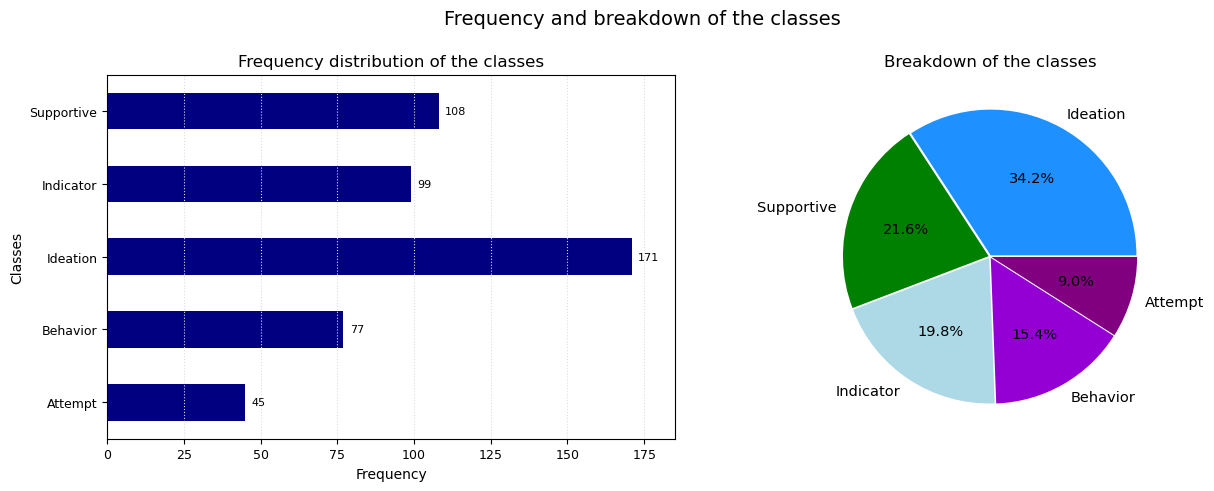

In [34]:
class_freq = data.groupby(['Label']).size()

fig = plt.figure(figsize=(13,5))
barchart = fig.add_subplot(1,2,1) 
piechart = fig.add_subplot(1,2,2)

class_freq.plot(x=class_freq.index, y=class_freq, kind='barh', color='navy', xlim=(0,185), ax=barchart)
for i in barchart.patches:
    barchart.annotate(i.get_width(), # get the frequency of the variable categories
                      xy = (i.get_width()+2, i.get_y() + i.get_height()-0.25), # set the coordinates for each label
                      ha='left', # set the horizontal alignment
                      va='center', # set the vertical alignment
                      fontsize=8) # set the font size

barchart.set_title('Frequency distribution of the classes', fontsize=12)
barchart.set_xlabel("Frequency", fontsize=10)
barchart.set_ylabel('Classes', fontsize=10)
barchart.set_xticks(range(0,180,25)) 
barchart.set_xticklabels(range(0,180,25), fontsize=9)
barchart.set_yticklabels(class_freq.index, fontsize=9)
barchart.grid(True, axis='x', color='gainsboro', ls= ':', linewidth=0.8)

data['Label'].value_counts().plot(kind='pie',
                                  #figsize=(3,3), # set axis lengths
                                  autopct='%1.1f%%',
                                  startangle=0, # rotates the start of the pie by ... degree counter-clock wise
                                  shadow=False, #add a shadow
                                  labels=data['Label'].value_counts().index,
                                  pctdistance=0.6, # push out the slice values
                                  colors=['dodgerblue','green','lightblue','darkviolet','purple'],
                                  fontsize=10.5,
                                  explode=[0.01,0.01,0.01,0.01,0.01],
                                  ax=piechart)

piechart.set_title('Breakdown of the classes', fontsize=12)
piechart.set_ylabel('')

fig.suptitle('Frequency and breakdown of the classes', fontsize=14)
plt.tight_layout(pad=1.3)
plt.show()

The dataset classes are quite imbalanced, with the biggest class, "Ideation", accounting for almost 35% of entries, and the smallest class, "Attempt", for less than 10%. 

#### Word Count Statistics

Let's count the number of words per each observation (user), and plot some relevant statistics.

In [35]:
#Count the number of words per each observation (user)
data['word_count'] = data['Post'].str.split().apply(lambda x: len(x))
data.head()

User                                               Post       Label  \
0  user-0  its not a viable option and youll be leaving y...  Supportive   
1  user-1  it can be hard to appreciate the notion that y...    Ideation   
2  user-2  hi so last night i was sitting on the ledge of...    Behavior   
3  user-3  i tried to kill my self once and failed badly ...     Attempt   
4  user-4  hi nem3030 what sorts of things do you enjoy d...    Ideation   

   word_count  
0         134  
1        2163  
2         470  
3         885  
4         208

In [36]:
#Calculate the average, maximum, minimum, and median number of words per each class.
word_ds = data.groupby(['Label'], as_index=False)['word_count'].mean()
word_ds.rename(columns={'word_count':'wc_mean'}, inplace=True)
word_ds['wc_max'] = data.groupby(['Label'], as_index=False)['word_count'].max()['word_count']
word_ds['wc_min'] = data.groupby(['Label'], as_index=False)['word_count'].min()['word_count']
word_ds['wc_med'] = data.groupby(['Label'], as_index=False)['word_count'].median()['word_count']
word_ds

Label      wc_mean  wc_max  wc_min  wc_med
0     Attempt  1504.488889    6426      78   867.0
1    Behavior  1558.376623    6700      29   943.0
2    Ideation  1200.888889    6259      19   611.0
3   Indicator  1451.474747    6224      44   698.0
4  Supportive  1314.527778    6262      10   502.0

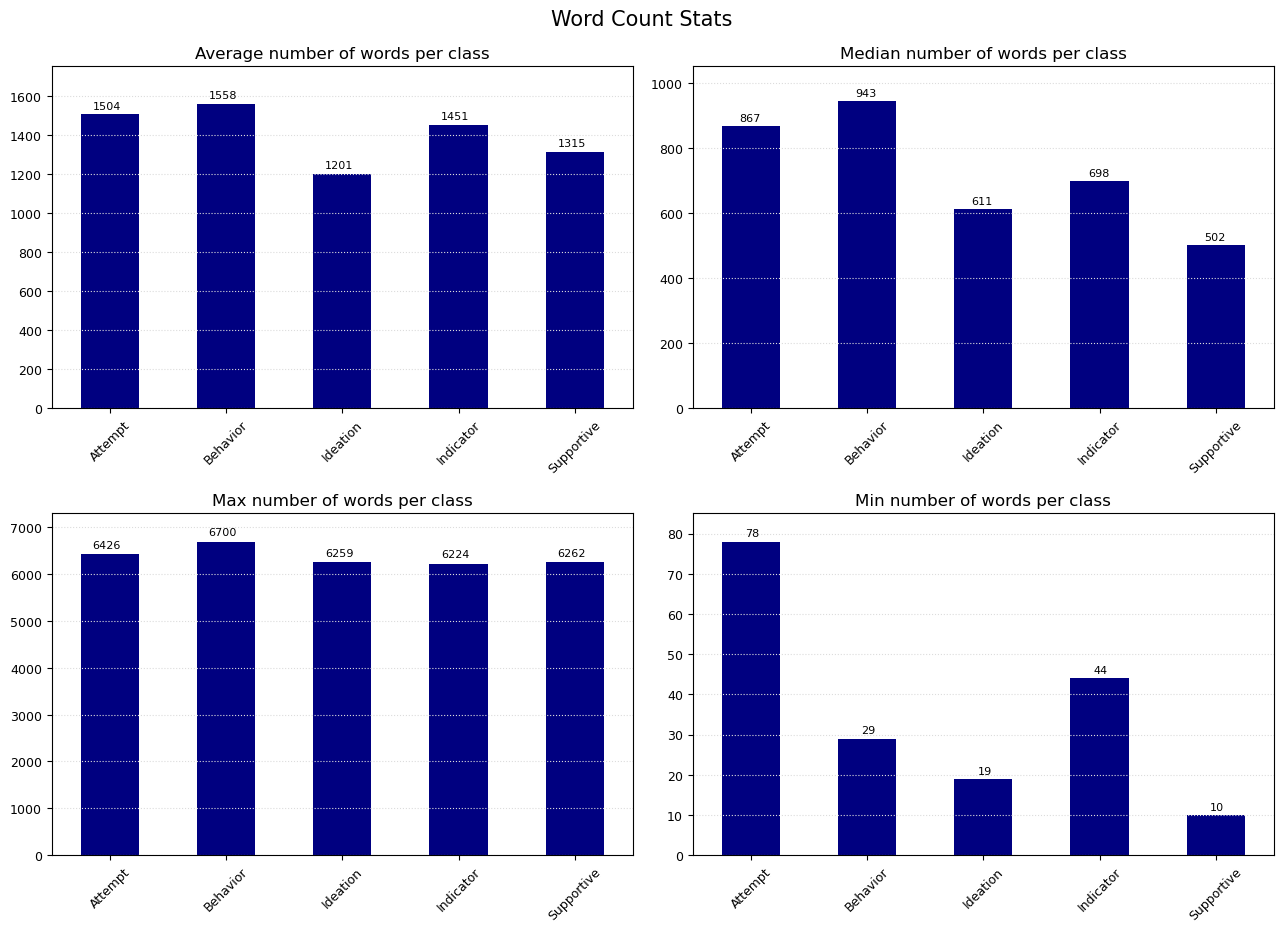

In [37]:
#Plot the stats
fig = plt.figure(figsize=(13,9.5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

word_ds.plot(x='Label', y='wc_mean', kind='bar', color='navy', rot=45, legend=False, ax=ax1)
ax1.set_title('Average number of words per class', fontsize=12)
ax1.set_xlabel("", fontsize=0.1)
ax1.set_xticklabels(word_ds.Label, fontsize=9)
ax1.set_yticks(range(0,1601,200))
ax1.set_yticklabels(range(0,1601,200), fontsize=9)
ax1.grid(True, axis='y', color='gainsboro', ls= ':', linewidth=0.8)
ax1.set_ylim(0,1750)
for i in ax1.patches:
    ax1.annotate(round(i.get_height(),),
                 xy = (i.get_x()+0.1, i.get_height()+45),
                 ha='left',
                 va='center',
                 fontsize=8)
    
word_ds.plot(x='Label', y='wc_med', kind='bar', color='navy', rot=45, legend=False, ax=ax2)
ax2.set_title('Median number of words per class', fontsize=12)
ax2.set_xlabel("", fontsize=0.1)
ax2.set_xticklabels(word_ds.Label, fontsize=9)
ax2.set_yticks(range(0,1001,200))
ax2.set_yticklabels(range(0,1001,200), fontsize=9)
ax2.grid(True, axis='y', color='gainsboro', ls= ':', linewidth=0.8)
ax2.set_ylim(0,1050)
for i in ax2.patches:
    ax2.annotate(round(i.get_height(),),
                 xy = (i.get_x()+0.15, i.get_height()+25),
                 ha='left',
                 va='center',
                 fontsize=8)
    
word_ds.plot(x='Label', y='wc_max', kind='bar', color='navy', rot=45, legend=False, ax=ax3)
ax3.set_title('Max number of words per class', fontsize=12)
ax3.set_xlabel("", fontsize=0.1)
ax3.set_xticklabels(word_ds.Label, fontsize=9)
ax3.set_yticks(range(0,7001,1000))
ax3.set_yticklabels(range(0,7001,1000), fontsize=9)
ax3.grid(True, axis='y', color='gainsboro', ls= ':', linewidth=0.8)
ax3.set_ylim(0,7300)
for i in ax3.patches:
    ax3.annotate(round(i.get_height(),),
                 xy = (i.get_x()+0.1, i.get_height()+200),
                 ha='left',
                 va='center',
                 fontsize=8)

word_ds.plot(x='Label', y='wc_min', kind='bar', color='navy', rot=45, legend=False, ax=ax4)
ax4.set_title('Min number of words per class', fontsize=12)
ax4.set_xlabel("", fontsize=0.1)
ax4.set_xticklabels(word_ds.Label, fontsize=9)
ax4.set_yticks(range(0,81,10))
ax4.set_yticklabels(range(0,81,10), fontsize=9)
ax4.grid(True, axis='y', color='gainsboro', ls= ':', linewidth=0.8)
ax4.set_ylim(0,85)
for i in ax4.patches:
    ax4.annotate(round(i.get_height(),),
                 xy = (i.get_x()+0.2, i.get_height()+2),
                 ha='left',
                 va='center',
                 fontsize=8)

fig.suptitle('Word Count Stats', fontsize=15)
plt.tight_layout(pad=1.3)
plt.show()

Some considerations:
- The average number of words used by an user is aroud 1,200 - 1,500,depending on the class, whilst the median number of words is much lower: from 500 to 900 words, depending on the class. This means the mean number of words is skewed by few very long posts.
- The longest user's text in all classes is above 6,000 words: these are the texts that skew the mean.

Let's analyze the word count frequecy per class.

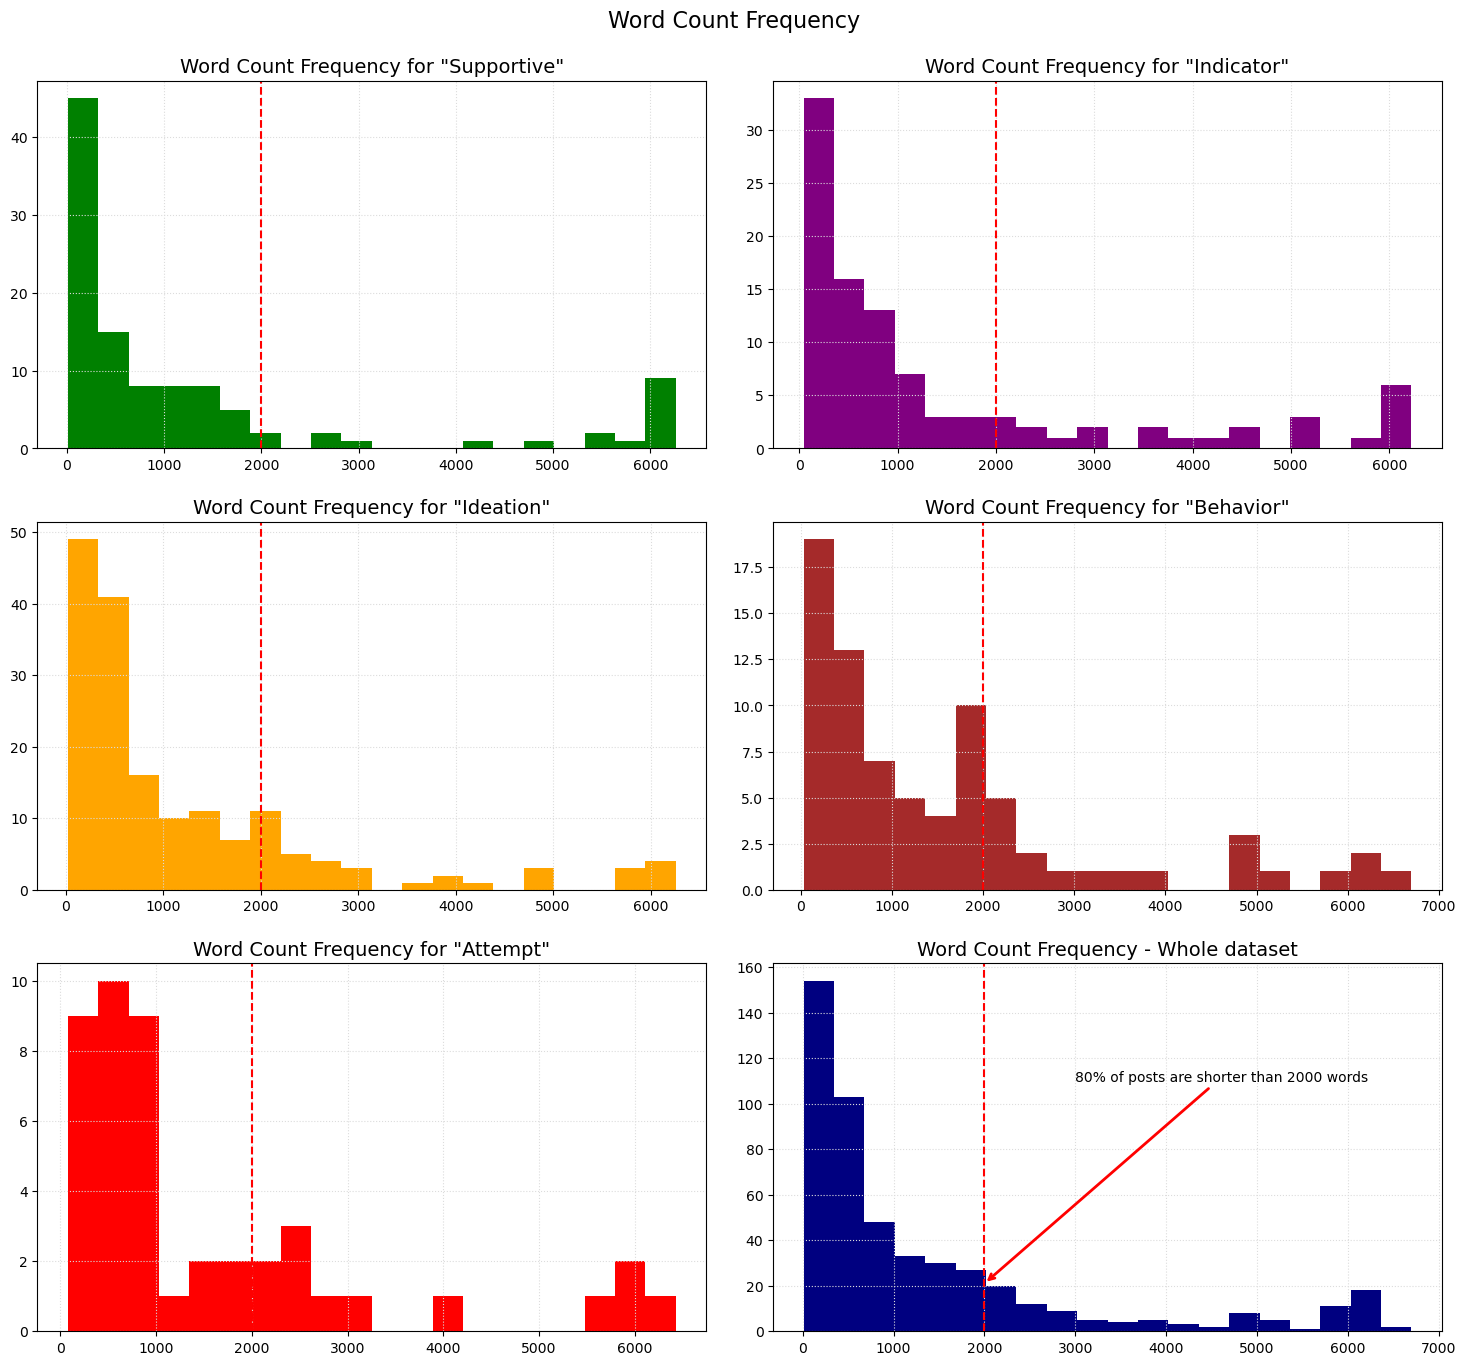

In [38]:
fig = plt.figure(figsize=(15,14))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.hist(data[data['Label'] == 'Supportive']['word_count'], bins=20, color='green')
ax1.axvline(x=2000, color='r', ls='--')
ax1.grid(True, axis='both', color='gainsboro', ls= ':', linewidth=0.8)
ax1.set_title('Word Count Frequency for "Supportive"', fontsize=14)

ax2.hist(data[data['Label'] == 'Indicator']['word_count'], bins=20, color='purple')
ax2.axvline(x=2000, color='r', ls='--')
ax2.grid(True, axis='both', color='gainsboro', ls= ':', linewidth=0.8)
ax2.set_title('Word Count Frequency for "Indicator"', fontsize=14)

ax3.hist(data[data['Label'] == 'Ideation']['word_count'], bins=20, color='orange')
ax3.axvline(x=2000, color='r', ls='--')
ax3.grid(True, axis='both', color='gainsboro', ls= ':', linewidth=0.8)
ax3.set_title('Word Count Frequency for "Ideation"', fontsize=14)

ax4.hist(data[data['Label'] == 'Behavior']['word_count'], bins=20, color='brown')
ax4.axvline(x=2000, color='r', ls='--')
ax4.grid(True, axis='both', color='gainsboro', ls= ':', linewidth=0.8)
ax4.set_title('Word Count Frequency for "Behavior"', fontsize=14)

ax5.hist(data[data['Label'] == 'Attempt']['word_count'], bins=20, color='red')
ax5.axvline(x=2000, color='r', ls='--')
ax5.grid(True, axis='both', color='gainsboro', ls= ':', linewidth=0.8)
ax5.set_title('Word Count Frequency for "Attempt"', fontsize=14)

ax6.hist(data['word_count'], bins=20, color='navy')
ax6.axvline(x=2000, color='r', ls='--')
ax6.grid(True, axis='both', color='gainsboro', ls= ':', linewidth=0.8)
ax6.set_title('Word Count Frequency - Whole dataset', fontsize=14)
ax6.annotate('80% of posts are shorter than 2000 words', xy=(2000,21), xytext=(3000,110), fontsize=10,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='r', lw=2))

fig.suptitle('Word Count Frequency', fontsize=16)
plt.tight_layout(pad=1.9)
plt.show()

In [39]:
print("Percentage of users' texts shorter than 2,000 words: {}%.".\
      format(round(len(data[data['word_count'] <= 2000].index)/data.shape[0]*100,)))

Percentage of users' texts shorter than 2,000 words: 79%.


It does seem that Word Count Frequency is more or less the same in all classes (with users labelled as "Attempt" and "Behavior" that tend to write slightly longer texts then the others).  
**Almost 80% of the users' posts are shorther than 2,000 words**.

#### Wordcloud Analysis

In [40]:
# To better understand the semantics of the sentences, I'll remove the stopwords from 2 different stopword lists
#NLTK Stopword List
stops = set(stopwords.words('english'))
# wordcloud stopword list
sw = STOPWORDS.copy()

sw = sw.union(stops)

#However, I modify the default lists of stopwords to exclude words that could be relevant for this analysis
sw = sw - set(["can't",'cannot', 'down', "mustn't", 'myself', 'no', 'ourselves', 'over', 'own', 'yourself'])
print('Length of stop word list:', len(sw))

Length of stop word list: 217


We know that 80% of users' posts are shorter than 2,000 words, so I'll plot word clouds per each of the class, up to the most frequent 2,000 words.

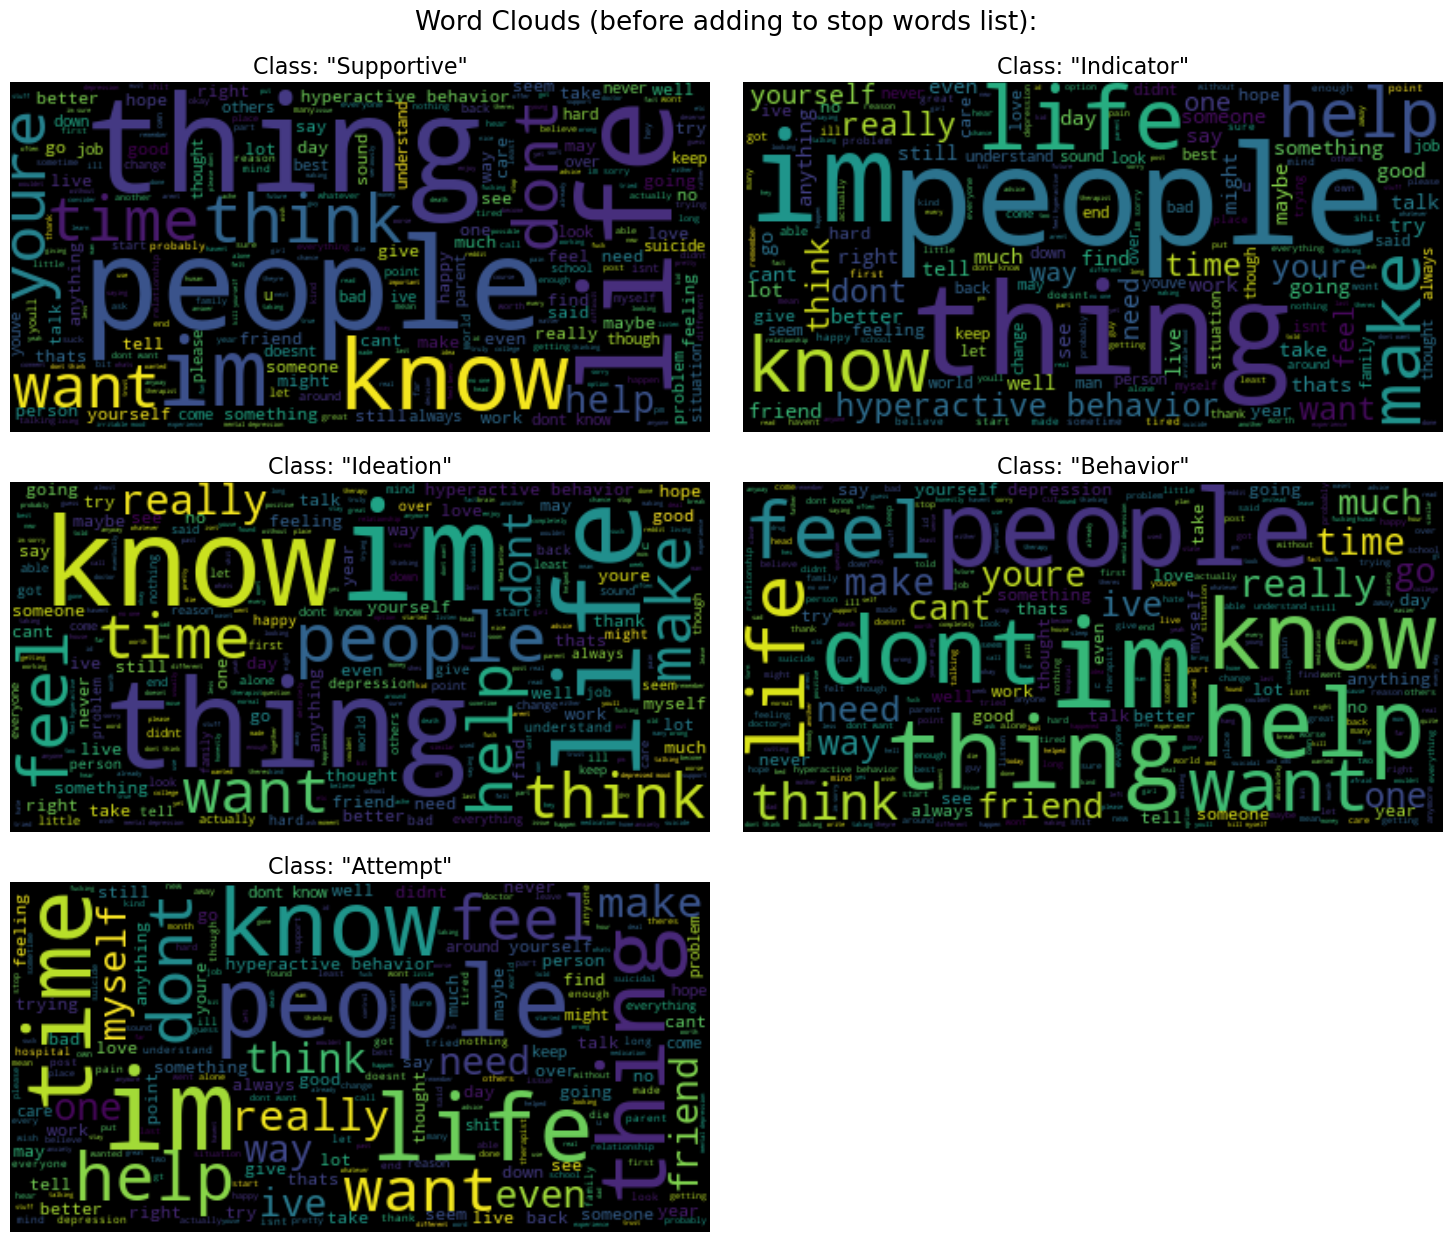

In [41]:
class_list = ['Supportive', 'Indicator', 'Ideation', 'Behavior', 'Attempt']
i=0
wc = WordCloud(background_color = 'black', max_words = 2000, stopwords = sw, random_state=96)

fig = plt.figure(figsize=(15,21))
for l in class_list:
    i+=1
    post = data[data['Label'] == l]['Post']
    txt = ' '.join(post)
    wc.generate(txt)   
    plt.subplot(5, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Class: "{}"'.format(l), fontsize=16)

plt.suptitle('Word clouds (before adding to stop words list):', fontsize=19)
plt.tight_layout(pad=2.4)
plt.show()

Word clouds don't really show any type of patterns, or semantic meaning, with regard to the classes: the most commnon words (life, people, thing, know, want...) are in fact shared by all classes.  
I'll add these "shared" words to the list of stop words, trying to show a clearer pattern, or boundary, that will help us clarify the meaning of the classes themselves.

In [42]:
# Add to the stopword list non-meaningful words or words shared by all classes
sw.update(['im', 'know', 'will', 'dont', 'really', "ive", 'youre', 'life', 'friend', 'live', 'give', 'love', 'things', 'way',
           'going', 'thats', 'people', 'time', 'even', 'feel', 'make', 'one', 'better', 'cant', 'think', 'need', 'no', 'help',
           'want', 'myself','hyperactive', 'behavior', 'now', 'talk', 'go', 'much', 'something', 'right', 'say', 'yourself',
           'good', 'find', 'see', 'someone', 'may', 'still', 'tell', 'back', 'well', 'lot', 'long', 'person', 'year', 'day',
           'work', 'take', "didn't", 'seem', 'anything', 'might', 'around', 'thought', 'never', 'always', "didnt", 'maybe',
           'over', 'doesnt', 'point', 'though', 'made', 'keep', 'everything', 'come', 'care', 'please', 'sure', 'thank',
           'anyone', 'getting', 'post', 'everyone', 'nothing', 'feeling', 'friends', 'years', 'look', 'pretty', 'isnt', 'put',
           'sound', 'got', 'seems', 'away', 'first', 'every', 'try', 'thing', 'let', 'youll', 'youve', 'said', 'u', 'theres',
           'us', 'sounds', 'trying', 'understand', 'happy', 'hard', 'bad', 'best', 'many', 'school', 'family', 'mood', 'world',
           'job', 'mind', 'actually', 'change', 'own', 'new', 'little', 'makes', 'believe', 'start', 'able', 'mental', 'ill',
           'end', 'enough', 'id', 'sometimes', 'probably', 'wont', 'down', 'parents', 'reason', 'least', 'bit', 'man', 'kind',
           'another', 'stop', 'times', 'place', 'without', 'done', 'last', 'problems', 'different', 'part', 'havent', 'problem',
           'hear', 'days', 'two'])

Re-plot the wordclouds:

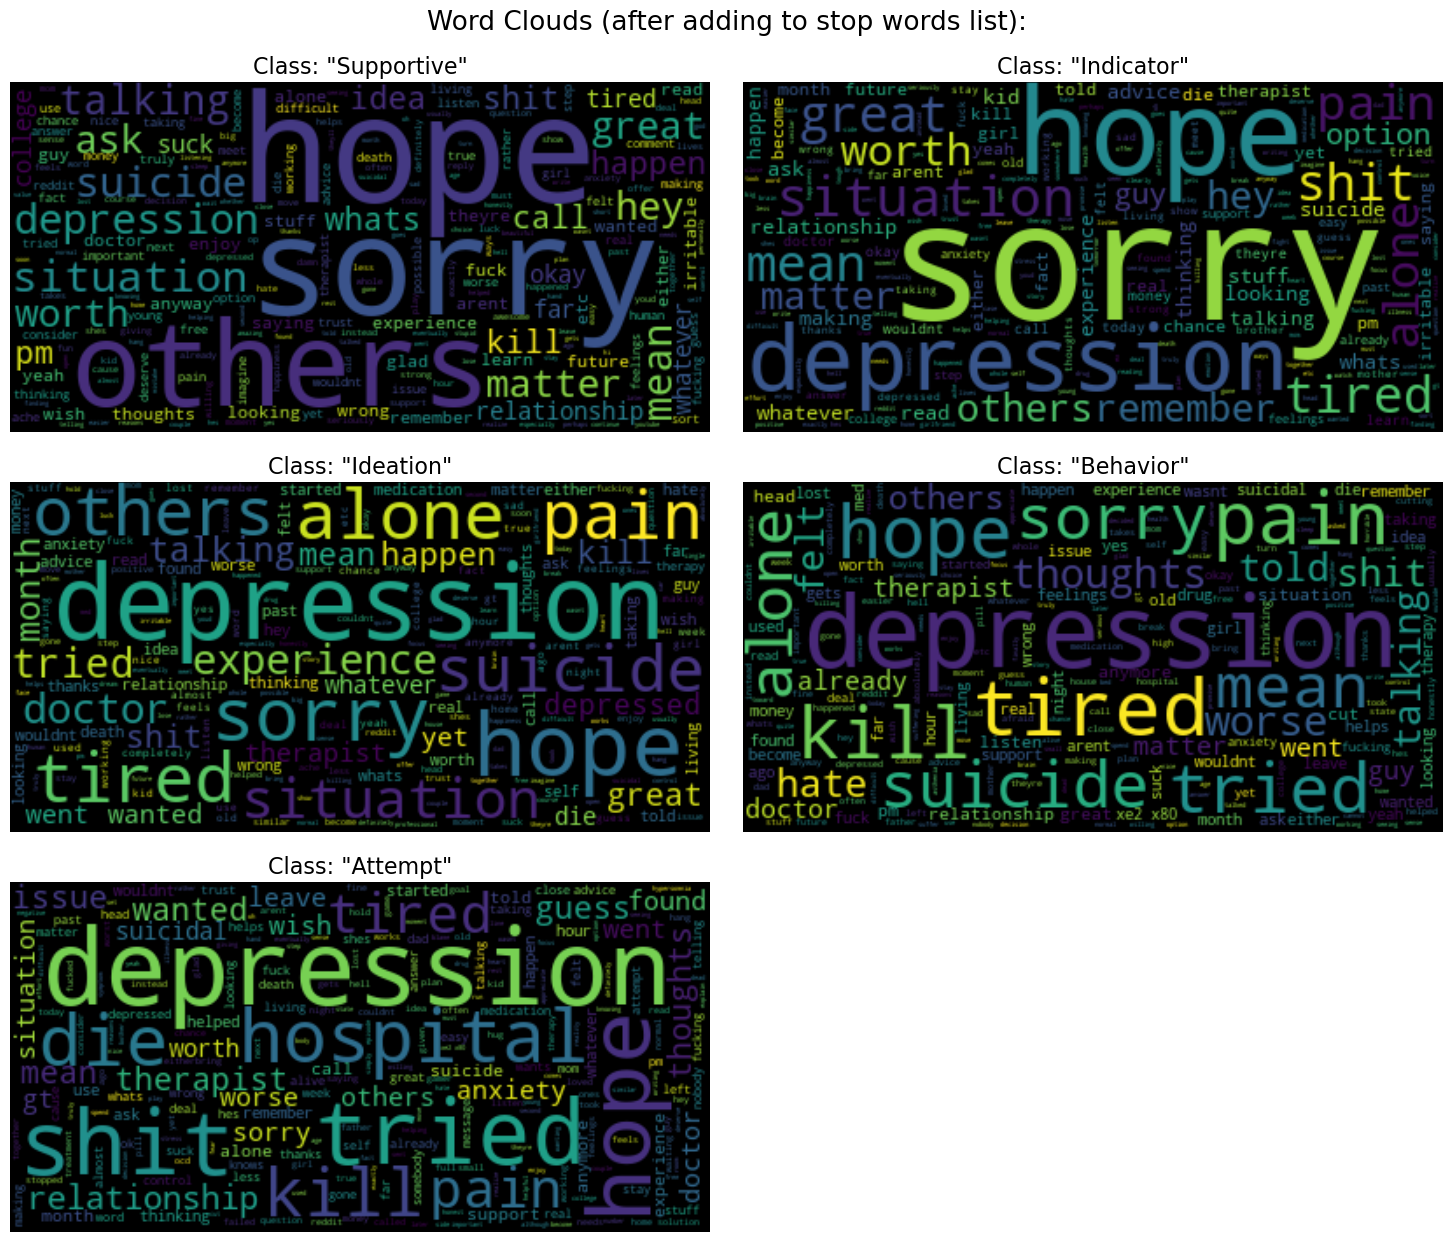

In [43]:
class_list = ['Supportive', 'Indicator', 'Ideation', 'Behavior', 'Attempt']
i=0
wc = WordCloud(background_color = 'black', max_words = 2000, stopwords = sw, random_state=96)

fig = plt.figure(figsize=(15,21))
for l in class_list:
    i+=1
    post = data[data['Label'] == l]['Post']
    txt = ' '.join(post)
    wc.generate(txt)   
    plt.subplot(5, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Class: "{}"'.format(l), fontsize=16)
    
plt.suptitle('Word clouds (after adding to stop words list):', fontsize=19)
plt.tight_layout(pad=2.4)
plt.show()

In [44]:
print('Length of stop word list used to build the Word Clouds:', len(sw))

Length of stop word list used to build the Word Clouds: 372


We can have now a better understanding of the classes, and start defining the boundary between users "at risk" and "not at risk":
- Words like "hope" and "sorry", although used in each class, have a greater relative frequency in the texts posted by the users labelled as "Supportive" and "Indicator".
- The word "depression", although widely used in all labels, is very frequent in the texts posted by the users labelled as "Ideation", "Behavior", and "Attempt", alongside with words such as "alone", "pain", "kill", "suicide", "hospital", "tired"...

Let's analyze now the relative frequency of the 20 most used words in each class.

#### Top 20 words - Relative Frequency Analysis

In [45]:
#let's remove the stop words
data['Post_nostopwords'] = data['Post'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

#Create a dataframe with the top 20 most used words (excluding stop words) and their frequency 
top_words = (' '.join(data.Post_nostopwords)).split()
tw = {'word':[], 'frequency':[]}
for tup in collections.Counter(top_words).most_common(20):
    tw['word'].append(tup[0])
    tw['frequency'].append(tup[1])
top_words = pd.DataFrame(tw)

#Plot the df
top_words

word  frequency
0   depression       1001
1         hope        810
2        sorry        672
3      suicide        666
4         pain        600
5        tired        541
6       others        511
7        alone        481
8     thoughts        461
9    situation        460
10        shit        453
11       great        425
12        kill        424
13     talking        424
14       worth        421
15       tried        418
16         ask        353
17       whats        353
18         hey        340
19      wanted        337

In [46]:
#Create lists with the words used in each class
supportive_words = (' '.join(data[data['Label'] == 'Supportive'].Post_nostopwords)).split()
indicator_words = (' '.join(data[data['Label'] == 'Indicator'].Post_nostopwords)).split()
ideation_words = (' '.join(data[data['Label'] == 'Ideation'].Post_nostopwords)).split()
behavior_words = (' '.join(data[data['Label'] == 'Behavior'].Post_nostopwords)).split()
attempt_words = (' '.join(data[data['Label'] == 'Attempt'].Post_nostopwords)).split()

#Add columns per each class, counting the word frequency
top_words['Supportive'] = top_words['word'].apply(lambda x: supportive_words.count(x))
top_words['Indicator'] = top_words['word'].apply(lambda x: indicator_words.count(x))
top_words['Ideation'] = top_words['word'].apply(lambda x: ideation_words.count(x))
top_words['Behavior'] = top_words['word'].apply(lambda x: behavior_words.count(x))
top_words['Attempt'] = top_words['word'].apply(lambda x: attempt_words.count(x))

#Calculate the frequency in % of each word in each class (calculated on the total per class)
top_words['Supportive'] = top_words['Supportive'].apply(lambda x: round(x/top_words['Supportive'].sum()*100,1))
top_words['Indicator'] = top_words['Indicator'].apply(lambda x: round(x/top_words['Indicator'].sum()*100,1))
top_words['Ideation'] = top_words['Ideation'].apply(lambda x: round(x/top_words['Ideation'].sum()*100,1))
top_words['Behavior'] = top_words['Behavior'].apply(lambda x: round(x/top_words['Behavior'].sum()*100,1))
top_words['Attempt'] = top_words['Attempt'].apply(lambda x: round(x/top_words['Attempt'].sum()*100,1))

#Let's plot the dataframe to check the result
top_words

word  frequency  Supportive  Indicator  Ideation  Behavior  Attempt
0   depression       1001         5.9        7.6      12.1      13.0     10.0
1         hope        810         9.4        8.4       8.2       6.2      6.7
2        sorry        672         8.1        8.6       6.0       4.9      4.3
3      suicide        666         7.2        5.3       6.4       7.0      7.2
4         pain        600         4.2        6.4       5.9       7.4      5.8
5        tired        541         3.8        5.4       5.2       7.2      5.6
6       others        511         6.7        4.5       5.1       4.0      4.3
7        alone        481         3.4        5.0       5.8       4.8      3.7
8     thoughts        461         4.0        3.1       4.8       5.6      5.8
9    situation        460         5.6        5.4       4.3       3.2      3.8
10        shit        453         3.8        5.5       3.7       4.0      7.0
11       great        425         4.6        5.6       3.8       3.4      3.0
12        kill        424         4.0        3.2       3.5       5.7      5.6
13     talking        424         5.4        3.5       4.2       4.1      3.0
14       worth        421         5.0        5.0       3.8       3.0      3.9
15       tried        418         2.6        3.0       4.1       5.5      7.2
16         ask        353         4.5        3.6       3.0       3.0      3.4
17       whats        353         4.2        4.2       3.4       2.3      2.8
18         hey        340         4.7        4.3       3.0       1.9      2.3
19      wanted        337         2.9        2.4       3.7       3.6      4.5

In [47]:
#Add a new column with the sum (along the columns) of each word % frequency: "sum_freq"
top_words['sum_freq'] = top_words[top_words.columns[2:]].sum(axis=1)

#Drop the "frequency" column
top_words.drop(['frequency'], axis=1, inplace=True)

#Calculate the relative frequecy of each word (relative to the frequency of each word in each class)  
top_words['Supportive'] = top_words[['Supportive', 'sum_freq']].apply(lambda x: round(x[0]/x[1]*100,2), axis=1)
top_words['Indicator'] = top_words[['Indicator', 'sum_freq']].apply(lambda x: round(x[0]/x[1]*100,2), axis=1)
top_words['Ideation'] = top_words[['Ideation', 'sum_freq']].apply(lambda x: round(x[0]/x[1]*100,2), axis=1)
top_words['Behavior'] = top_words[['Behavior', 'sum_freq']].apply(lambda x: round(x[0]/x[1]*100,2), axis=1)
top_words['Attempt'] = top_words[['Attempt', 'sum_freq']].apply(lambda x: round(x[0]/x[1]*100,2), axis=1)

#Drop the "sum_freq" column
top_words.drop(['sum_freq'], axis=1, inplace=True)

#Let's plot the dataframe to see the results
top_words

word  Supportive  Indicator  Ideation  Behavior  Attempt
0   depression       12.14      15.64     24.90     26.75    20.58
1         hope       24.16      21.59     21.08     15.94    17.22
2        sorry       25.39      26.96     18.81     15.36    13.48
3      suicide       21.75      16.01     19.34     21.15    21.75
4         pain       14.14      21.55     19.87     24.92    19.53
5        tired       13.97      19.85     19.12     26.47    20.59
6       others       27.24      18.29     20.73     16.26    17.48
7        alone       14.98      22.03     25.55     21.15    16.30
8     thoughts       17.17      13.30     20.60     24.03    24.89
9    situation       25.11      24.22     19.28     14.35    17.04
10        shit       15.83      22.92     15.42     16.67    29.17
11       great       22.55      27.45     18.63     16.67    14.71
12        kill       18.18      14.55     15.91     25.91    25.45
13     talking       26.73      17.33     20.79     20.30    14.85
14       worth       24.15      24.15     18.36     14.49    18.84
15       tried       11.61      13.39     18.30     24.55    32.14
16         ask       25.71      20.57     17.14     17.14    19.43
17       whats       24.85      24.85     20.12     13.61    16.57
18         hey       29.01      26.54     18.52     11.73    14.20
19      wanted       16.96      14.04     21.64     21.05    26.32

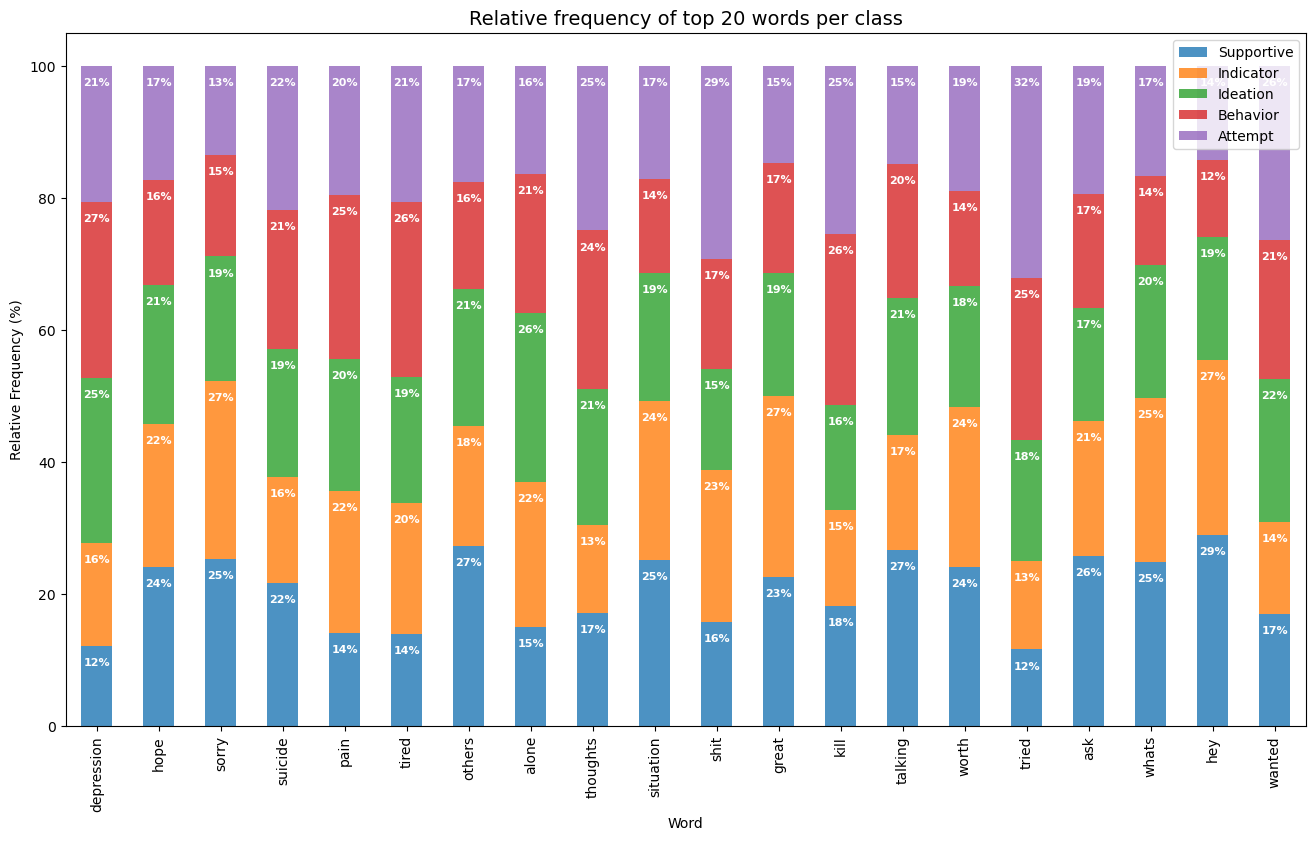

In [48]:
barchart = top_words.plot(x='word', y=top_words.columns[1:], kind='bar', legend=True, stacked=True, alpha=0.8, figsize=(16,9))
for bar in barchart.patches:
    barchart.text(bar.get_x() + bar.get_width() / 2,
                  bar.get_height() + bar.get_y()-3,
                  str(round(bar.get_height(),))+'%',
                  ha='center',
                  color='w',
                  weight='bold',
                  size=8)
plt.title('Relative frequency of top 20 words per class', fontsize=14)
plt.xlabel('Word', fontsize=10)
plt.ylabel('Relative Frequency (%)', fontsize=10)
plt.legend(loc='best', fontsize='10', )
plt.show()

Relative Frequency Analysis results:
- Users labelled as **Supportive** and **Indicator** use, more often then the others, words such as "sorry", and "worth"; this suggests that post authors may express sympathy for someone else's problem or life situation.
- The same users also use (more often than the others) non-meangiful words such as "great", "whats", and "hey". Although these words don't carry any meaning per se (or anyway not outside the context), this difference may indicate a tendency of these users to use "lighter" words, and an overall tone of voice more friendly, easy-going, and casual. 
- Users labelled as **Ideation**, **Behavior**, and **Attempt** use, more often then the others, words such as "depression", "thoughts", "tried", and "wanted". This suggests an ongoing struggle with mental issues like depression, a failed attempt at something (maybe suicide, or maybe a life goal), and a general feeling of regret.

---

E.D.A. Results:
- **Supportive** and **Indicator**: these users don't seem to suffer from mental issues (or anyway not in a sever way) and they are not at risk of attempting suicide or self-harm. **I'll classify these users as Not-at-risk (Negative Class)**.
- **Ideation**, **Behavior**, **Attempt**: these users struggle with depression, or other mental issues, they may be having suicidal thoughts, dealing with suicidal behavior, have already tried to commit suicide, or actively planning to do it. **These are the users at-risk** of attempting suicide or self-harm **(Positive Class)**.

---

I'll create a new column, called **class**, with following values:
- **0**. For users belonging to the labels **Supportive** and **Indicator** (Negative Class). 
- **1**. For users belonging to the labels **Ideation**, **Behavior**, and **Attempt** (Positive Class).

In [49]:
data['class'] = data['Label'].apply(lambda x: 0 if x in ['Supportive', 'Indicator'] else 1)

Let's plot the distribution and breakdown of the new classes

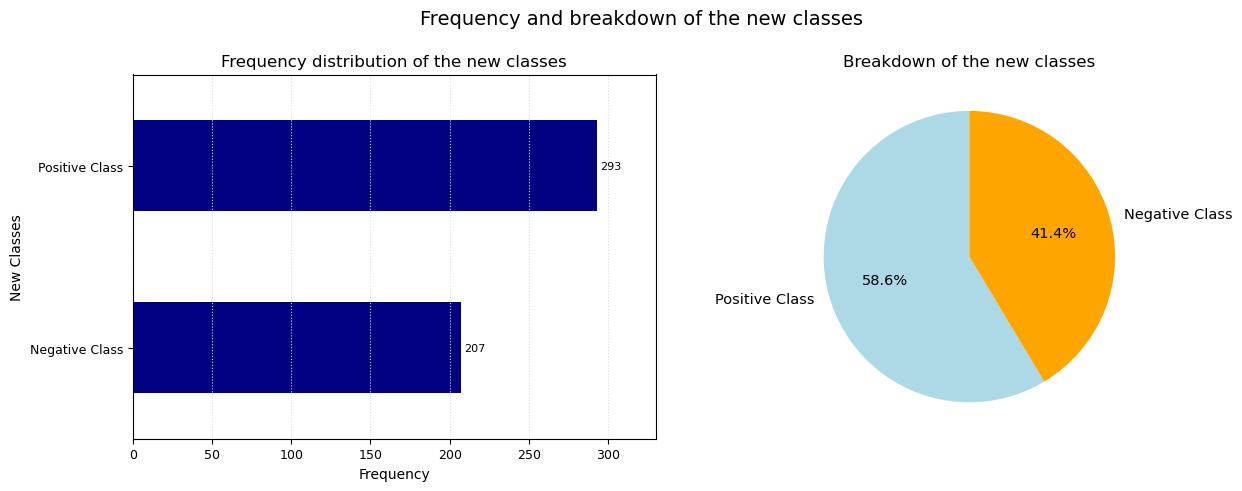

In [69]:
class_freq = data.groupby(['class']).size()

fig = plt.figure(figsize=(13,5))
barchart = fig.add_subplot(1,2,1) 
piechart = fig.add_subplot(1,2,2)

class_freq.plot(x=class_freq.index, y=class_freq, kind='barh', color='navy', ax=barchart)
for i in barchart.patches:
    barchart.annotate(i.get_width(), # get the frequency of the variable categories
                      xy = (i.get_width()+2, i.get_y() + i.get_height()-0.25), # set the coordinates for each label
                      ha='left', # set the horizontal alignment
                      va='center', # set the vertical alignment
                      fontsize=8) # set the font size

barchart.set_title('Frequency distribution of the new classes', fontsize=12)
barchart.set_xlabel("Frequency", fontsize=10)
barchart.set_ylabel('New Classes', fontsize=10)
barchart.set_xlim(0, 330)
barchart.set_xticks(range(0,331,50)) 
barchart.set_xticklabels(range(0,331,50), fontsize=9)
barchart.set_yticklabels(['Negative Class', 'Positive Class'], fontsize=9)
barchart.grid(True, axis='x', color='gainsboro', ls= ':', linewidth=0.8)

data['class'].value_counts().plot(kind='pie',
                                  #figsize=(3,3), # set axis lengths
                                  autopct='%1.1f%%',
                                  startangle=90, # rotates the start of the pie by ... degree counter-clock wise
                                  shadow=False, #add a shadow
                                  labels=['Positive Class', 'Negative Class'],
                                  pctdistance=0.6, # push out the slice values
                                  colors=['lightblue','orange'],
                                  fontsize=10.5,
                                  #explode=[0.01,0.01,0.01,0.01,0.01],
                                  ax=piechart)

piechart.set_title('Breakdown of the new classes', fontsize=12)
piechart.set_ylabel('')

fig.suptitle('Frequency and breakdown of the new classes', fontsize=14)
plt.tight_layout(pad=1.3)
plt.show()

The dataset is quite imbalanced: almost 60% of the users belong to the positive class, that is users at risk of attempting suicide or self-harm.

Let's plot now the word clouds of the new classes (up to the most frequent 2,000 words).

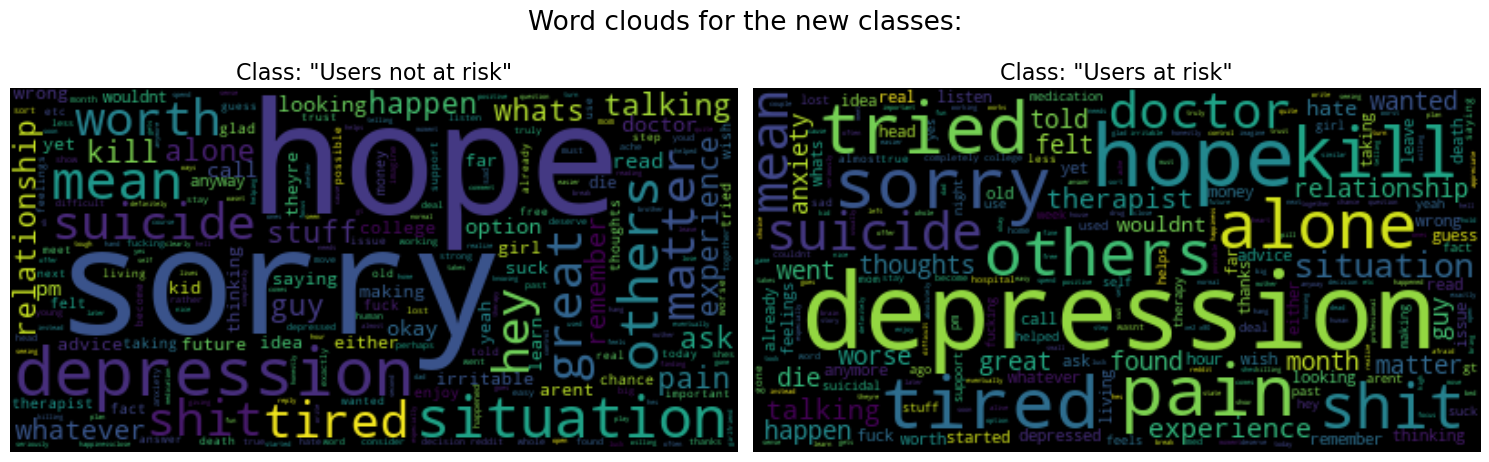

In [88]:
class_list = {0: 'Users not at risk', 1: 'Users at risk'}
i=0
wc = WordCloud(background_color = 'black', max_words = 2000, stopwords = sw, random_state=96)

fig = plt.figure(figsize=(15,5))
for l in class_list:
    i+=1
    post = data[data['class'] == l]['Post']
    txt = ' '.join(post)
    wc.generate(txt)   
    plt.subplot(1, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Class: "{}"'.format(class_list[l]), fontsize=16)
    
plt.suptitle('Word clouds for the new classes:', fontsize=19)
plt.tight_layout()
plt.show()

We can see now a clear distinction between the classes.

Let's plot now the relative frequency of the top 20 words.

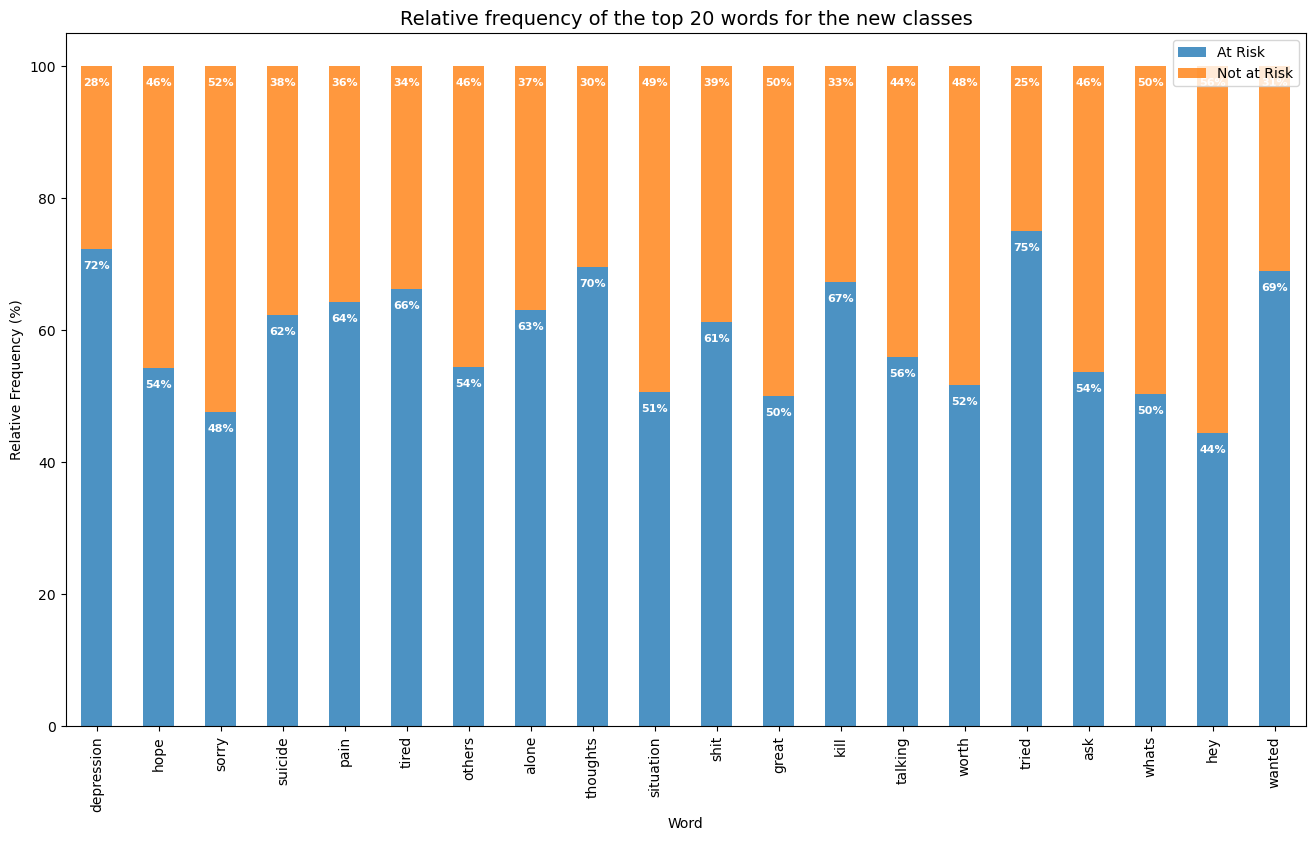

In [99]:
top_words['At Risk'] = top_words[['Ideation', 'Behavior', 'Attempt']].apply(lambda x: x[0]+x[1]+x[2], axis=1)
top_words['Not at Risk'] = top_words[['Supportive', 'Indicator']].apply(lambda x: x[0]+x[1], axis=1)

barchart = top_words.plot(x='word', y=top_words.columns[6:], kind='bar', legend=True, stacked=True, alpha=0.8, figsize=(16,9))
for bar in barchart.patches:
    barchart.text(bar.get_x() + bar.get_width() / 2,
                  bar.get_height() + bar.get_y()-3,
                  str(round(bar.get_height(),))+'%',
                  ha='center',
                  color='w',
                  weight='bold',
                  size=8)
plt.title('Relative frequency of the top 20 words for the new classes', fontsize=14)
plt.xlabel('Word', fontsize=10)
plt.ylabel('Relative Frequency (%)', fontsize=10)
plt.legend(loc='best', fontsize='10', )
plt.show()

Again, we can see now a clearer boundary between the classses, whereas users "At Risk" use, much more than users "Not at Risk", words such as: depression, tried, thoughts, wanted, tired, pain, suicide, kill, alone, shit. 

Since I couldn't import the wordcloud library in my environment with TensorFlow, I'll export the dataset and I'll import it in another notebook (within my TensorFlow environment) where I can continue the data preparation and modelling.

---

- Thanks to the word cloud analysis, I came up with a list of words shared by all classes that we can delete from the dataset. This way I'll strengthen the differences between classes, and therefore help the model correctly classify the users' posts. After the Word Cloud Analysis, the stop word list increased by 106 words.

##### Exporting the data for Notebook - Part 2, in Tensorflow Environment

In [100]:
#export the dataset, after the cleaning and the analysis
data.to_csv('data.csv', index=False)

In [101]:
#export the list of stopwords
stop_words = open('stop_words.txt', 'w')
for w in sw:
    stop_words.write(w)
    stop_words.write('\n')

stop_words.close()
print('Is the file closed?', stop_words.closed)

Is the file closed? True
